In [1]:
import matplotlib.pyplot as plt
import pystac_client

from mccn._types import FilterConfig
from mccn.extent import GeoBoxBuilder
from mccn.parser import parse_item, band_filter
from mccn.loader.vector import VectorLoader

client = pystac_client.Client.open("http://203.101.230.81:8082")

### Attributes only

In [2]:
attr_collection = client.get_collection("attribute")
items = [parse_item(item) for item in attr_collection.get_items(recursive=True)]
pitems = []
bands = None
for item in items:
    pitem = band_filter(item, bands)
    if pitem:
        pitems.append(pitem)

attr_loader = VectorLoader(
    pitems,
    filter_config=FilterConfig(GeoBoxBuilder.from_collection(attr_collection, 100)),
)
attr_ds = attr_loader.load()
attr_ds

<xarray.Dataset> Size: 162kB
Dimensions:      (time: 1, lat: 100, lon: 100)
Coordinates:
  * lat          (lat) float64 800B -37.48 -37.49 -37.49 ... -37.99 -38.0 -38.0
  * lon          (lon) float64 800B 144.5 144.5 144.5 ... 144.9 144.9 144.9
    spatial_ref  int32 4B 4326
  * time         (time) object 8B 2024-12-31T14:20:00+00:00
Data variables:
    AREASQKM21   (time, lat, lon) float64 80kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    SA2_NAME21   (time, lat, lon) int64 80kB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
Attributes:
    legend:   {'SA2_NAME21': {'Werribee - South': 1, 'Werribee - East': 2, 'W...

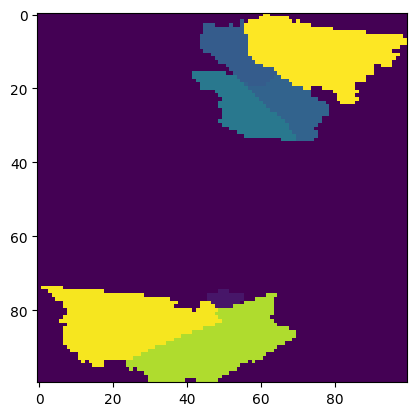

In [3]:
plt.imshow(attr_ds.AREASQKM21.values[0, :, :])
plt.show()

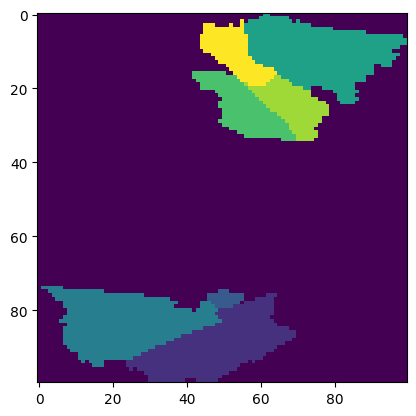

In [4]:
plt.imshow(attr_ds.SA2_NAME21.values[0, :, :])
plt.show()

### Mask only

In [5]:
mask_collection = client.get_collection("mask")
items = [parse_item(item) for item in mask_collection.get_items(recursive=True)]
pitems = []
bands = None
for item in items:
    pitem = band_filter(item, bands)
    if pitem:
        pitems.append(pitem)

mask_loader = VectorLoader(
    pitems,
    filter_config=FilterConfig(GeoBoxBuilder.from_collection(mask_collection, 100)),
)
mask_ds = mask_loader.load()
mask_ds

<xarray.Dataset> Size: 162kB
Dimensions:       (time: 1, lat: 100, lon: 100)
Coordinates:
  * lat           (lat) float64 800B -37.48 -37.49 -37.49 ... -37.99 -38.0 -38.0
  * lon           (lon) float64 800B 144.5 144.5 144.5 ... 144.9 144.9 144.9
    spatial_ref   int32 4B 4326
  * time          (time) object 8B 2024-12-31T14:20:00+00:00
Data variables:
    SA2_Werribee  (time, lat, lon) int64 80kB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    SA2_Sunbury   (time, lat, lon) int64 80kB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0

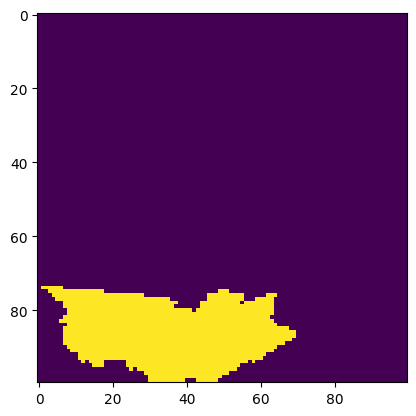

In [6]:
plt.imshow(mask_ds.SA2_Werribee.values[0, :, :])
plt.show()

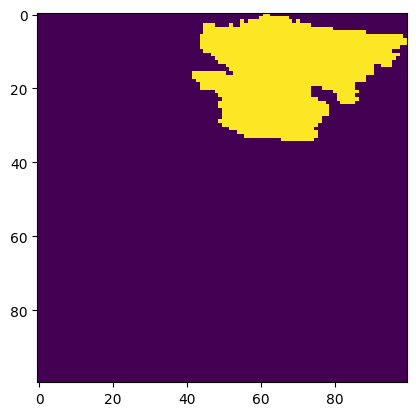

In [7]:
plt.imshow(mask_ds.SA2_Sunbury.values[0, :, :])
plt.show()

### Mask + Attribute

In [8]:
mask_attribute_collection = client.get_collection("mask_attribute")
items = [
    parse_item(item) for item in mask_attribute_collection.get_items(recursive=True)
]
pitems = []
bands = None
for item in items:
    pitem = band_filter(item, bands)
    if pitem:
        pitems.append(pitem)

mask_attribute_loader = VectorLoader(
    pitems,
    filter_config=FilterConfig(
        GeoBoxBuilder.from_collection(mask_attribute_collection, 100)
    ),
)
mask_attribute_ds = mask_attribute_loader.load()
mask_attribute_ds

<xarray.Dataset> Size: 242kB
Dimensions:       (time: 1, lat: 100, lon: 100)
Coordinates:
  * lat           (lat) float64 800B -37.48 -37.49 -37.49 ... -37.99 -38.0 -38.0
  * lon           (lon) float64 800B 144.5 144.5 144.5 ... 144.9 144.9 144.9
    spatial_ref   int32 4B 4326
  * time          (time) object 8B 2024-12-31T14:20:00+00:00
Data variables:
    AREASQKM21    (time, lat, lon) float64 80kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    SA2_NAME21    (time, lat, lon) int64 80kB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    SA2_Werribee  (time, lat, lon) int64 80kB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
Attributes:
    legend:   {'SA2_NAME21': {'Sunbury': 1, 'Diggers Rest': 2, 'Sunbury - Sou...

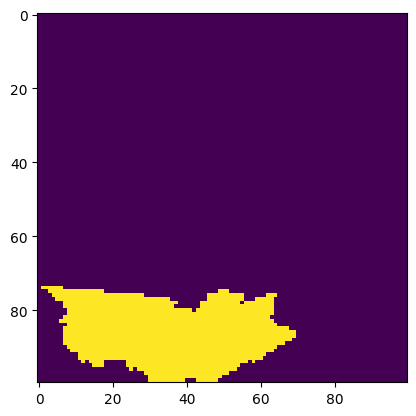

In [9]:
plt.imshow(mask_attribute_ds.SA2_Werribee.values[0, :, :])
plt.show()

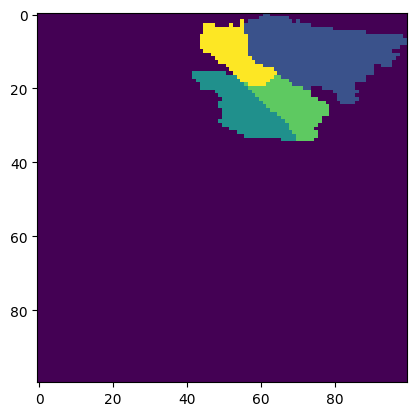

In [10]:
plt.imshow(mask_attribute_ds.SA2_NAME21.values[0, :, :])
plt.show()

### Join

In [11]:
join_collection = client.get_collection("join")
items = [parse_item(item) for item in join_collection.get_items(recursive=True)]
pitems = []
bands = None
for item in items:
    pitem = band_filter(item, bands)
    if pitem:
        pitems.append(pitem)

join_loader = VectorLoader(
    pitems,
    filter_config=FilterConfig(GeoBoxBuilder.from_collection(join_collection, 100)),
)
join_ds = join_loader.load()
join_ds

<xarray.Dataset> Size: 3MB
Dimensions:           (time: 4, lat: 100, lon: 100)
Coordinates:
  * lat               (lat) float64 800B -37.78 -37.78 -37.79 ... -38.0 -38.0
  * lon               (lon) float64 800B 144.4 144.4 144.5 ... 144.8 144.8 144.8
    spatial_ref       int32 4B 4326
  * time              (time) object 32B 2020-01-01T00:00:00+00:00 ... 2025-01...
Data variables:
    Area              (time, lat, lon) int64 320kB 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    Yield             (time, lat, lon) float64 320kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Drive             (time, lat, lon) float64 320kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Distance          (time, lat, lon) float64 320kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Sell_Price        (time, lat, lon) float64 320kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Suburb_Name       (time, lat, lon) int64 320kB 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    Public_Transport  (time, lat, lon) float64 320kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Rent_Price        (time, lat, lon) float64 320kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Sell/Rent         (time, lat, lon) float64 320kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Growth            (time, lat, lon) float64 320kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    legend:   {'Area': {'Hoppers Crossing': 1, 'Wyndham Vale': 2, 'Werribee':...

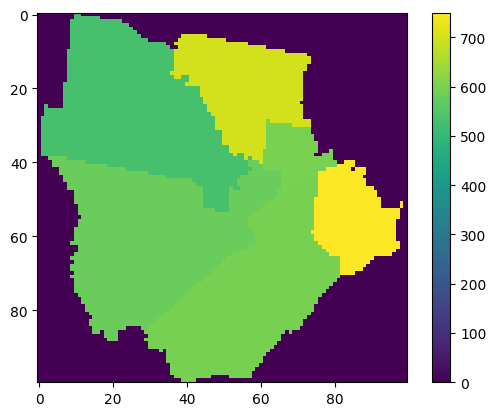

In [18]:
plt.imshow(join_ds.Sell_Price.values[3, :, :])
plt.colorbar()
plt.show()